<a href="https://colab.research.google.com/github/mahidhar-rayapati/HAR-ML-models/blob/main/human_activity_recognition_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

#**2.** **Load the** **dataset**

In [2]:
data=pd.read_csv('train.csv')
df=data.copy()
print(f'Shape of the dataset is {df.shape}')
results = pd.DataFrame(columns=['model', 'Classifier' , 'Train-Accuracy', 'Test-Accuracy' ])

Shape of the dataset is (7352, 563)


# **3. Visualization**

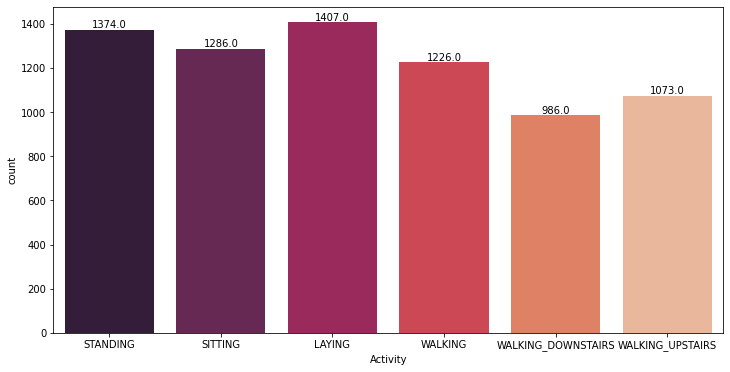

In [3]:
plt.figure(figsize=(12,6))
sns.countplot(x="Activity",data=df,palette=sns.color_palette('rocket'))
plt.xticks(x=df['Activity'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom')
plt.show()

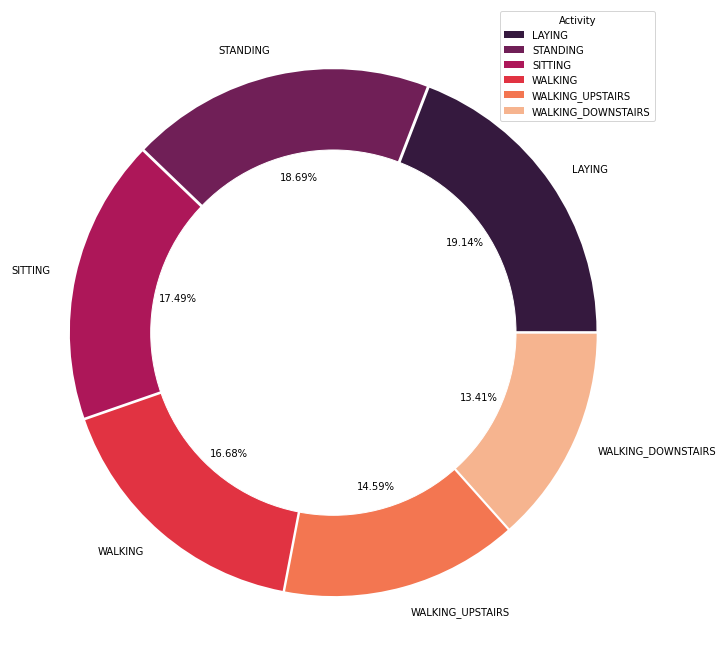

In [4]:
plt.figure(figsize=(12,12))
l=df.iloc[:,-1].value_counts().to_dict()
e=[0.01,0.01,0.01,0.01,0.01,0.01]
plt.pie(l.values(),labels=l.keys(),explode=e,autopct='%.2f%%',startangle=0,colors=sns.color_palette('rocket'))
plt.legend(title='Activity')
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.show()

# **4. Split the data into features and target**

In [5]:
x = df.iloc[:, :-1].values #features
y = df.iloc[:, -1].values #target

# **5. Split the data into training and test sets**

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Shape of the dataset:",data.shape)
print("Shape of train dataset:",x_train.shape)
print("Shape of test dataset:",x_test.shape)

Shape of the dataset: (7352, 563)
Shape of train dataset: (5881, 562)
Shape of test dataset: (1471, 562)


# **6. Preprocessing**

In [7]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **7. Logistic Regression**






Train accuracy of Logistic regression is: 99.7619%
Test accuracy of Logistic regression is: 98.3005%


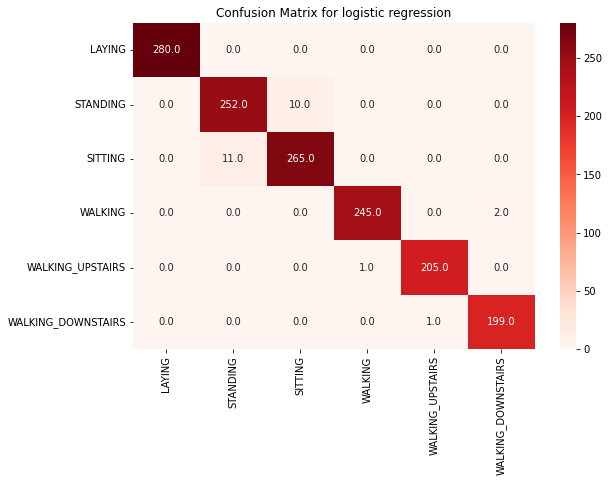

In [8]:
LR = LogisticRegression(solver='lbfgs',max_iter=10000)
LR.fit(x_train, y_train)
LR_y_pred = LR.predict(x_test)
LR_rand=LR.score(x_train,y_train)
LR_accuracy = accuracy_score(y_test,LR_y_pred)
print(f'Train accuracy of Logistic regression is: {round(LR_rand*100,4)}%')
print(f'Test accuracy of Logistic regression is: {round(LR_accuracy*100,4)}%')
results.loc[0]=['LR','Logistic Regression',LR_rand*100,LR_accuracy*100]
plt.figure(figsize=(9,6))
LR_CM=confusion_matrix(y_test,LR_y_pred)
sns.heatmap(LR_CM, annot= True, cmap= plt.cm.Reds, fmt= '.1f',xticklabels=l.keys(),yticklabels=l.keys())
plt.title('Confusion Matrix for logistic regression')
plt.show()

# **8. KNN**

Train accuracy of KNN is: 97.9935%
Test accuracy of KNN is: 96.329%


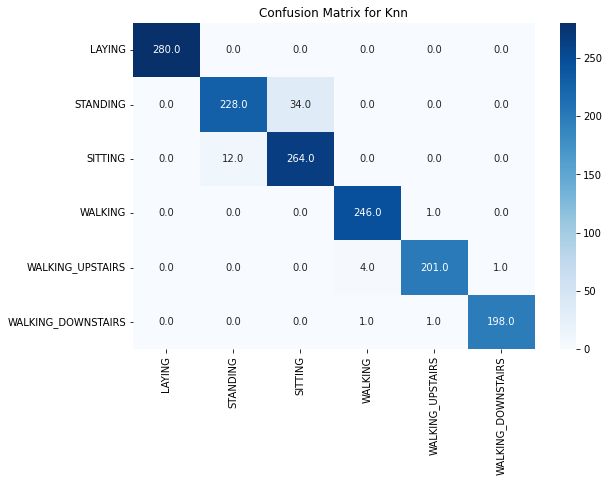

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)
knn_rand=knn.score(x_train,y_train)
knn_accuracy = accuracy_score(y_test,knn_y_pred)
print(f'Train accuracy of KNN is: {round(knn_rand*100,4)}%')
print(f'Test accuracy of KNN is: {round(knn_accuracy*100,4)}%')
results.loc[1]=['KNN','KNeighboursClassifier',knn_rand*100,knn_accuracy*100]
plt.figure(figsize=(9,6))
KNN_CM=confusion_matrix(y_test,knn_y_pred)
sns.heatmap(KNN_CM, annot= True, cmap= plt.cm.Blues, fmt= '.1f',xticklabels=l.keys(),yticklabels=l.keys())
plt.title('Confusion Matrix for Knn')
plt.show()

# **9. Random forest**



Train accuracy of Random forest is: 100.0%
Test accuracy of Random forest is: 97.9606%


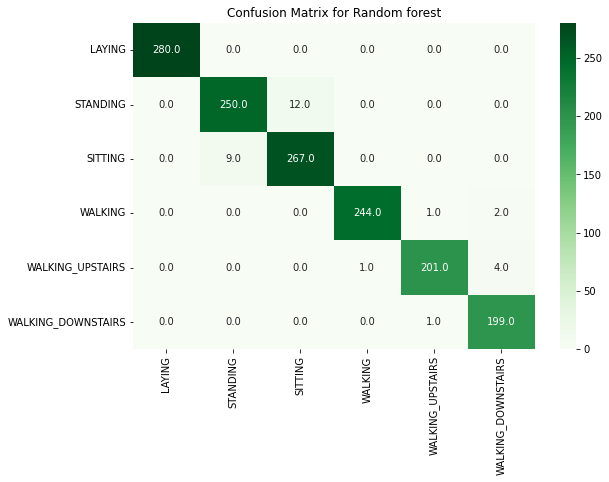

In [10]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_train, y_train)
RF_y_pred = RF.predict(x_test)
RF_rand = RF.score(x_train,y_train)
RF_accuracy = accuracy_score(y_test,RF_y_pred)
print(f'Train accuracy of Random forest is: {round(RF_rand*100,4)}%')
print(f'Test accuracy of Random forest is: {round(RF_accuracy*100,4)}%')
results.loc[2]=['RF','RandomForestClassifier',RF_rand*100,RF_accuracy*100]
plt.figure(figsize=(9,6))
RF_CM=confusion_matrix(y_test,RF_y_pred)
sns.heatmap(RF_CM, annot= True, cmap= plt.cm.Greens, fmt= '.1f',xticklabels=l.keys(),yticklabels=l.keys())
plt.title('Confusion Matrix for Random forest')
plt.show()

# **10. Support vector machine**



Train accuracy of linear SVM is: 99.7449%
Test accuracy of linear SVM is: 97.8926%


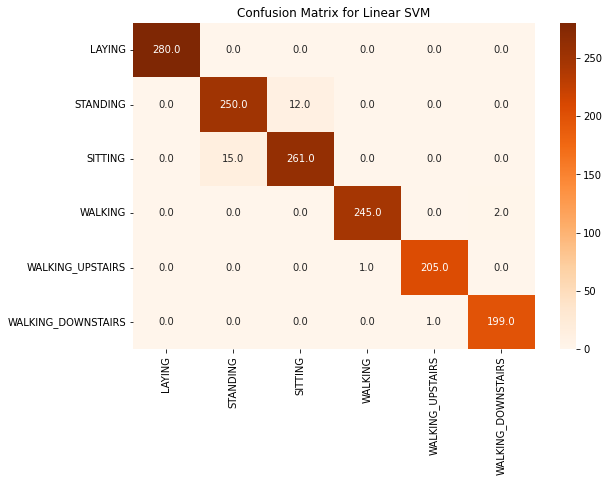

In [11]:
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
svm_rand=svm.score(x_train,y_train)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'Train accuracy of linear SVM is: {round(svm_rand*100,4)}%')
print(f'Test accuracy of linear SVM is: {round(svm_accuracy*100,4)}%')
results.loc[3]=['SVM','SGDClassifier',svm_rand*100,svm_accuracy*100]
plt.figure(figsize=(9,6))
SVM_CM=confusion_matrix(y_test,svm_y_pred)
sns.heatmap(SVM_CM, annot= True, cmap= plt.cm.Oranges, fmt= '.1f',xticklabels=l.keys(),yticklabels=l.keys())
plt.title('Confusion Matrix for Linear SVM')
plt.show()

# **11. Naive bayes**

Train accuracy of Naive bayes is: 73.6609%
Test accuracy of Naive bayes is: 73.1475%


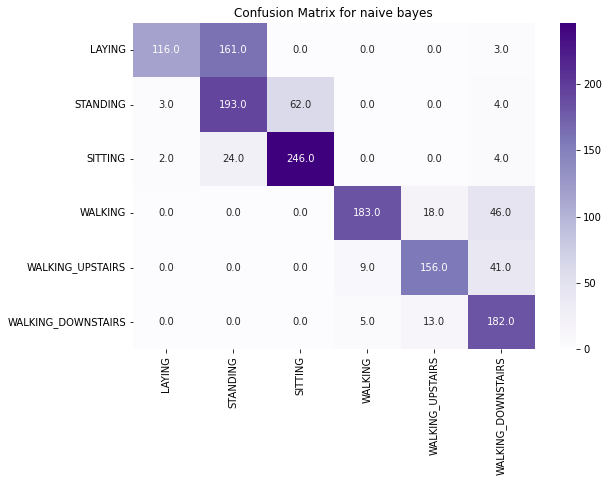

In [12]:
NB= GaussianNB()
NB.fit(x_train, y_train)
NB_y_pred = NB.predict(x_test)
NB_rand=NB.score(x_train,y_train)
NB_accuracy = accuracy_score(y_test, NB_y_pred)
print(f'Train accuracy of Naive bayes is: {round(NB_rand*100,4)}%')
print(f'Test accuracy of Naive bayes is: {round(NB_accuracy*100,4)}%')
results.loc[4]=['NB','GaussianNB',NB_rand*100,NB_accuracy*100]
plt.figure(figsize=(9,6))
NB_CM=confusion_matrix(y_test,NB_y_pred)
sns.heatmap(NB_CM, annot= True, cmap= plt.cm.Purples, fmt= '.1f',xticklabels=l.keys(),yticklabels=l.keys())
plt.title('Confusion Matrix for naive bayes')
plt.show()

# **12. Comparing Accuracy**

In [13]:
results

,model,Classifier,Train-Accuracy,Test-Accuracy
0,LR,Logistic Regression,99.761945,98.300476
1,KNN,KNeighboursClassifier,97.993539,96.329028
2,RF,RandomForestClassifier,100.000000,97.960571
3,SVM,SGDClassifier,99.744941,97.892590
4,NB,GaussianNB,73.660942,73.147519


# **13. Visualizing Results**

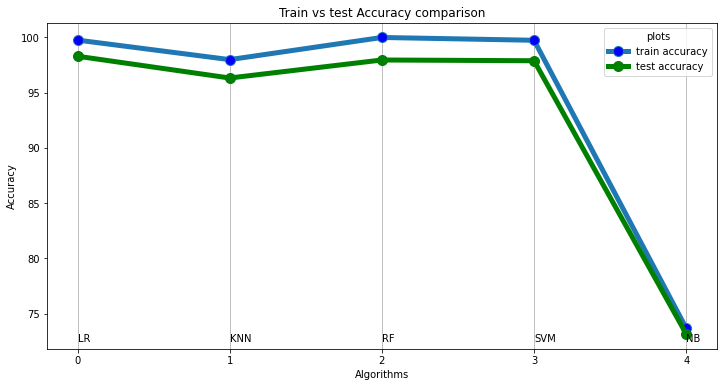

In [14]:
plt.figure(figsize=(12,6))
plt.plot(results['Train-Accuracy'],marker='o',markersize=10,mfc='b',label='train accuracy',linewidth=5,)
plt.plot(results['Test-Accuracy'],c = 'g',marker='o',markersize=10,mfc='g',label='test accuracy',linewidth=5)
plt.locator_params(axis='x',nbins=5)
plt.text(0,72.5,'LR',)
plt.text(1,72.5,'KNN')
plt.text(2,72.5,'RF')
plt.text(3,72.5,'SVM')
plt.text(4,72.5,'NB')
plt.grid(axis='x')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title('Train vs test Accuracy comparison')
plt.legend(title='plots')
plt.show()

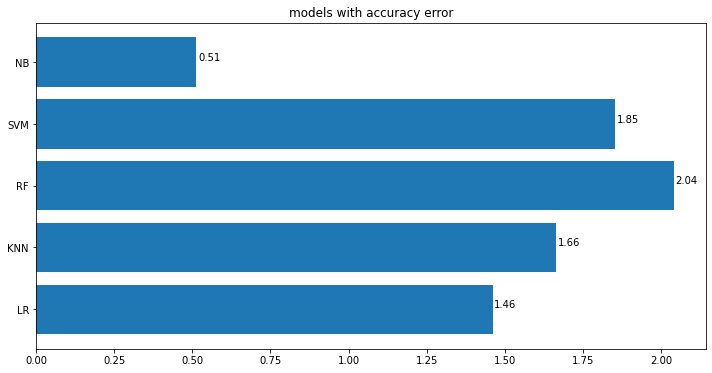

In [15]:
plt.figure(figsize=(12,6))
plt.barh(results['model'],results['Train-Accuracy']-results['Test-Accuracy'])
for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().annotate(f'{width :.2f}', (width+0.04,p.get_y()+p.get_height()/2), ha='center', va='bottom')
plt.title('models with accuracy error')
plt.show()